## Plotting

- Base module/library is matplotlib
- Pandas builds on matplotlib to provide plotting of DataFrames
- Seaborn builds on matplotlib to provide plotting of DataFrames, similar to Pandas, but sometimes easier.

Pandas online doc: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Seaborn online doc: http://seaborn.pydata.org/index.html

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Matlab-style plotting
Get example from `x5_visualization.ipynb`

In [2]:
x = np.linspace(0, 2* np.pi, 100)

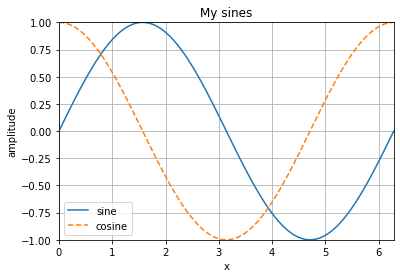

In [3]:
plt.plot(x, np.sin(x), '-', label='sine')
plt.plot(x, np.cos(x), '--', label ='cosine')

plt.xlim([0, 2*np.pi])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('amplitude')
plt.title('My sines')
plt.grid()
plt.legend();

## Object-oriented interface
Get example from `x5_visualization.ipynb`

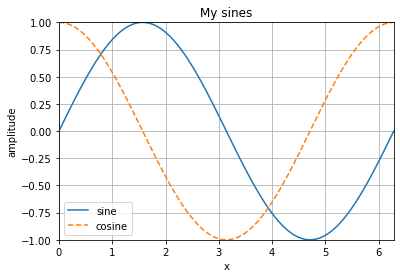

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-', label='sine')
ax.plot(x, np.cos(x), '--', label ='cosine')

ax.set(xlim=[0, 2*np.pi], ylim=[-1, 1],
       xlabel='x', ylabel='amplitude',
       title='My sines');
ax.grid()
ax.legend();

## Pandas
- Load chicken
- inspect chicken with 4 steps

In [5]:
# Using ls (dir) and head (type, gc -Head 10) check which datasets we have

In [6]:
!ls *.csv

chicken.csv       diabetes-orig.csv diabetes.csv      heart-attack.csv


In [7]:
!head chicken.csv

week,age,diet,weight,eggs
0,147,A,3106.2,4
0,157,A,2891.7,5
0,163,A,2958.3,4
0,145,A,3188.7,5
0,162,A,3491.7,5
0,167,A,3050.2,5
0,148,A,3185.7,5
0,166,A,2683.9,4
0,135,A,2971.8,4


In [8]:
# load chicken
chicken = pd.read_csv('chicken.csv')
chicken

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5
...,...,...,...,...,...
355,22,212,C,2966.5,4
356,22,176,C,3927.9,4
357,22,180,C,3361.6,5
358,22,193,C,3804.4,5


In [9]:
type(chicken)

pandas.core.frame.DataFrame

After loading data, it is good practice to check what we have. Usually, the sequences is:
1. Check dimension
2. Peek at the first rows
3. Get info on data types and missing values
4. Summarize columns

In [10]:
# 1. Check dimension
chicken.shape

(360, 5)

In [11]:
# 2. Peek at the first rows
chicken.head()

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5


In [12]:
# 3. get info on data types and missing values
chicken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    360 non-null    int64  
 1   age     360 non-null    int64  
 2   diet    360 non-null    object 
 3   weight  360 non-null    float64
 4   eggs    360 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 14.2+ KB


In [13]:
# another way to check for null values using isnull and sum
chicken.isnull().sum()

week      0
age       0
diet      0
weight    0
eggs      0
dtype: int64

In [14]:
chicken.sum()

week                                                   3960
age                                                   64536
diet      AAAAAAAAAABBBBBBBBBBCCCCCCCCCCAAAAAAAAAABBBBBB...
weight                                            1248238.0
eggs                                                   1523
dtype: object

In [15]:
# 4. summarize
chicken.describe()

,week,age,weight,eggs
count,360.000000,360.000000,360.000000,360.000000
mean,11.000000,179.266667,3467.327778,4.230556
std,6.913714,17.386833,425.962265,0.671472
min,0.000000,135.000000,2383.300000,3.000000
25%,5.500000,167.000000,3165.500000,4.000000
50%,11.000000,178.000000,3440.950000,4.000000
75%,16.500000,193.000000,3754.775000,5.000000
max,22.000000,217.000000,4845.000000,5.000000


In [16]:
# a specific column, diet
chicken['diet'].describe()

count     360
unique      3
top         A
freq      120
Name: diet, dtype: object

In [17]:
chicken.diet.describe()

count     360
unique      3
top         A
freq      120
Name: diet, dtype: object

## Pandas indexing
Select a specific diet, say 'B', and describe the values.

In [18]:
chicken[chicken.diet == 'B']

,week,age,diet,weight,eggs
10,0,195,B,3089.5,5
11,0,187,B,2946.6,4
12,0,178,B,2690.3,4
13,0,189,B,2893.7,4
14,0,167,B,3120.9,4
...,...,...,...,...,...
345,22,183,B,3927.0,4
346,22,212,B,4057.6,3
347,22,185,B,3884.0,4
348,22,177,B,3430.7,5


In [19]:
chicken[chicken.week == 0].describe()

,week,age,weight,eggs
count,30.0,30.000000,30.000000,30.000000
mean,0.0,168.266667,3028.950000,4.533333
std,0.0,16.203306,257.252223,0.507416
min,0.0,135.000000,2383.300000,4.000000
25%,0.0,157.250000,2892.200000,4.000000
50%,0.0,165.500000,3054.850000,5.000000
75%,0.0,184.000000,3180.975000,5.000000
max,0.0,195.000000,3622.300000,5.000000


## Pandas groupby
We can group values by a certain column, e.g. 'diet' and ask for the mean.

In [20]:
chicken.groupby(by='diet').mean()

,week,age,weight,eggs
diet,,,,
A,11.0,166.5,3634.852500,4.483333
B,11.0,187.9,3351.299167,4.033333
C,11.0,183.4,3415.831667,4.175000


In [21]:
chicken.mean()

/var/folders/gg/97_t00fn7l967t16dxkyv5c40000gn/T/ipykernel_2595/923624139.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chicken.mean()


week        11.000000
age        179.266667
weight    3467.327778
eggs         4.230556
dtype: float64

In [22]:
chicken.groupby(by=['week', 'diet']).mean()

age   weight  eggs
week diet                      
0    A     155.5  3069.50   4.6
     B     176.9  2962.86   4.4
     C     172.4  3054.49   4.6
2    A     157.5  3162.29   4.5
     B     178.9  3028.41   3.8
     C     174.4  3115.87   4.2
4    A     159.5  3257.86   4.6
     B     180.9  3095.40   4.2
     C     176.4  3178.51   4.0
6    A     161.5  3356.32   4.4
     B     182.9  3163.87   4.2
     C     178.4  3242.40   4.1
8    A     163.5  3457.77   4.2
     B     184.9  3233.86   3.9
     C     180.4  3307.55   4.3
10   A     165.5  3562.28   4.6
     B     186.9  3305.40   3.9
     C     182.4  3374.05   4.2
12   A     167.5  3669.95   4.3
     B     188.9  3378.53   3.9
     C     184.4  3441.86   4.0
14   A     169.5  3780.88   4.6
     B     190.9  3453.25   4.1
     C     186.4  3511.05   4.2
16   A     171.5  3895.17   4.3
     B     192.9  3529.65   4.0
     C     188.4  3581.60   4.0
18   A     173.5  4012.89   4.4
     B     194.9  3607.72   4.0
     C     190.4  3653.61   4.3
20   A     175.5  4134.19   4.7
     B     196.9  3687.54   4.0
     C     192.4  3727.04   4.0
22   A     177.5  4259.13   4.6
     B     198.9  3769.10   4.0
     C     194.4  3801.95   4.2

## Pandas and Seaborn plotting

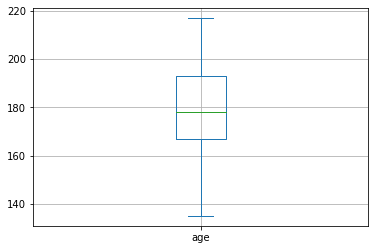

In [23]:
# pandas box plot of all ages
ax = chicken.age.plot.box()
# now add the grid
ax.grid()


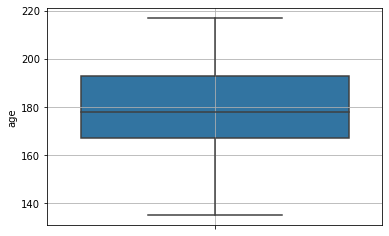

In [24]:
# seaborn box plot of all ages
ax = sns.boxplot(y='age', data=chicken)
# now add the grid
ax.grid()

<AxesSubplot:title={'center':'age'}, xlabel='diet'>

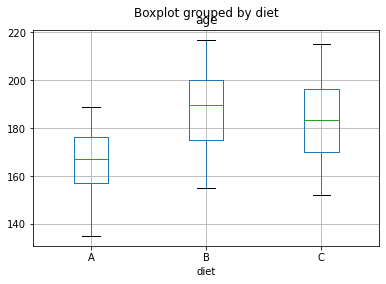

In [25]:
# pandas boxplot of ages in each diet
chicken.boxplot(column='age', by='diet')

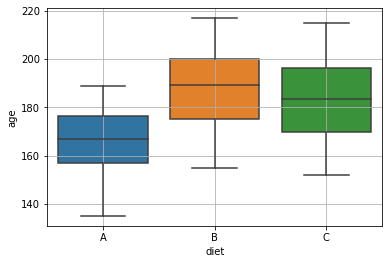

In [26]:
# seaborn boxplot of ages in each diet
ax = sns.boxplot(x='diet', y='age', data=chicken)
# now add the grid
ax.grid()

## Plot average age vs weeks by diet

### Pandas

In [27]:
# groupby week and diet, get age column, get mean
chicken.groupby(by=['week', 'diet']).age.mean()

week  diet
0     A       155.5
      B       176.9
      C       172.4
2     A       157.5
      B       178.9
      C       174.4
4     A       159.5
      B       180.9
      C       176.4
6     A       161.5
      B       182.9
      C       178.4
8     A       163.5
      B       184.9
      C       180.4
10    A       165.5
      B       186.9
      C       182.4
12    A       167.5
      B       188.9
      C       184.4
14    A       169.5
      B       190.9
      C       186.4
16    A       171.5
      B       192.9
      C       188.4
18    A       173.5
      B       194.9
      C       190.4
20    A       175.5
      B       196.9
      C       192.4
22    A       177.5
      B       198.9
      C       194.4
Name: age, dtype: float64

We need to unstack first.

In [28]:
# groupby week and diet, get age column, get mean, unstack
chicken.groupby(by=['week', 'diet']).age.mean().unstack()

diet,A,B,C
week,,,
0,155.5,176.9,172.4
2,157.5,178.9,174.4
4,159.5,180.9,176.4
6,161.5,182.9,178.4
8,163.5,184.9,180.4
10,165.5,186.9,182.4
12,167.5,188.9,184.4
14,169.5,190.9,186.4
16,171.5,192.9,188.4


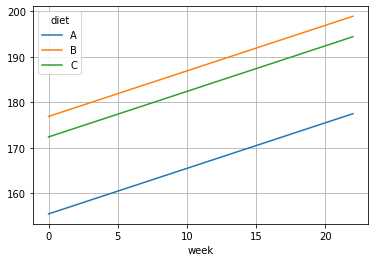

In [29]:
# groupby week and diet, get age column, get mean, finally, plot
ax = chicken.groupby(by=['week', 'diet']).age.mean().unstack().plot()
ax.grid()

### Seaborn

<AxesSubplot:xlabel='week', ylabel='age'>

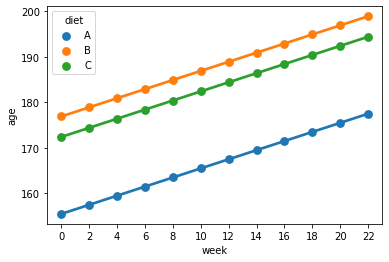

In [30]:
# seaborn pointplot with x, y, hue, data, ci
sns.pointplot(x='week', y='age', hue='diet', data=chicken, ci=None)

## Scatter plot eggs vs age by diet

### Pandas

<AxesSubplot:xlabel='age', ylabel='eggs'>

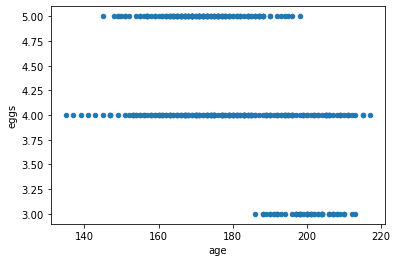

In [31]:
# plot.scatter x=age, y=eggs
chicken.plot.scatter(x='age', y='eggs')

<AxesSubplot:xlabel='age', ylabel='eggs'>

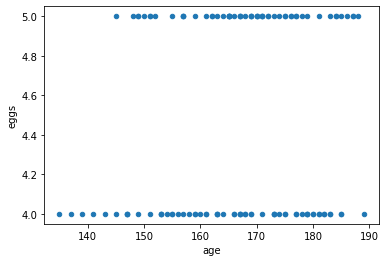

In [32]:
# same as above, plot.scatter x=age, y=eggs, but select diet=='A'
chicken[chicken.diet == 'A'].plot.scatter(x='age', y='eggs')

<AxesSubplot:xlabel='age', ylabel='eggs'>

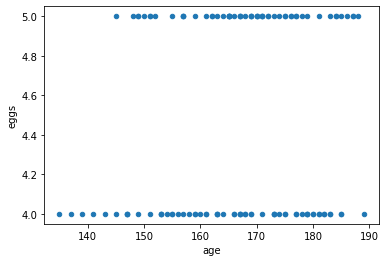

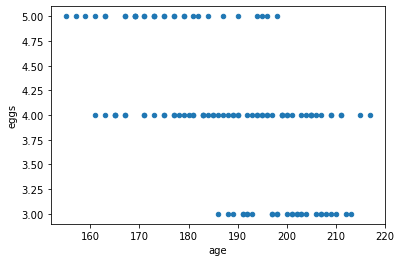

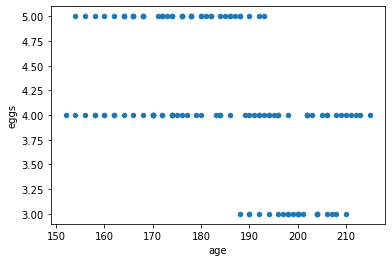

In [33]:
# same as above, but repeat for each diet
chicken[chicken.diet == 'A'].plot.scatter(x='age', y='eggs')
chicken[chicken.diet == 'B'].plot.scatter(x='age', y='eggs')
chicken[chicken.diet == 'C'].plot.scatter(x='age', y='eggs')

<AxesSubplot:xlabel='age', ylabel='eggs'>

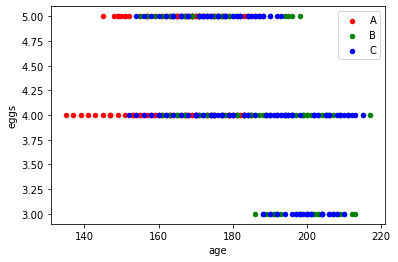

In [34]:
# same as above, but repeat for each diet, plotting in the same axes object, adding formatting.
scatter_ax = plt.axes()
chicken[chicken.diet == 'A'].plot.scatter(x='age', y='eggs', ax=scatter_ax, c='red', label='A')
chicken[chicken.diet == 'B'].plot.scatter(x='age', y='eggs', ax=scatter_ax, c='green', label='B')
chicken[chicken.diet == 'C'].plot.scatter(x='age', y='eggs', ax=scatter_ax, c='blue', label='C')

### Seaborn

<AxesSubplot:xlabel='age', ylabel='eggs'>

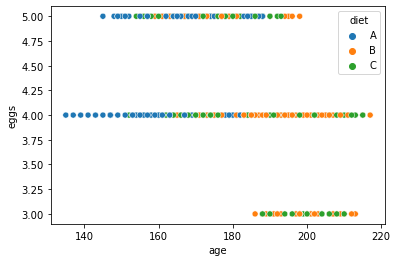

In [35]:
# scatterplot with x, y, hue and data
sns.scatterplot(x='age', y='eggs', hue='diet', data=chicken)